### Titanic - Project
A Step by step guide to explore data, find patterns and idenitify insights within data
* Data Exploration
* Data Preparation/Transformation
* Data Visualization
* Data Modeling

In [63]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [102]:
# Get the titanic train and test data
train_df = pd.read_csv("C:/Users/hiremamr/Documents/AcadGild/Titanic_Test/train.csv")
test_df = pd.read_csv("C:/Users/hiremamr/Documents/AcadGild/Titanic_Test/test.csv")

# Preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
train_df.info()
print('-'*30)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

In [104]:
# Drop unnecessry columns , PassengerId, Name, Ticket
train_df = train_df.drop(['PassengerId','Name', 'Ticket'], axis=1)
test_df = test_df.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [105]:
# Find missing values
train_df.isnull().sum().sort_values(ascending=False) / train_df.shape[0]

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Parch       0.000000
SibSp       0.000000
Sex         0.000000
Pclass      0.000000
Survived    0.000000
dtype: float64

In [106]:
# Drop columns with more than 30% missingness
threshold = int(0.30* train_df.shape[0])
train_df.dropna(thresh=threshold, axis=1, inplace=True)
test_df.dropna(thresh=threshold, axis=1, inplace=True)

In [107]:
train_df['Embarked'].describe().top

'S'

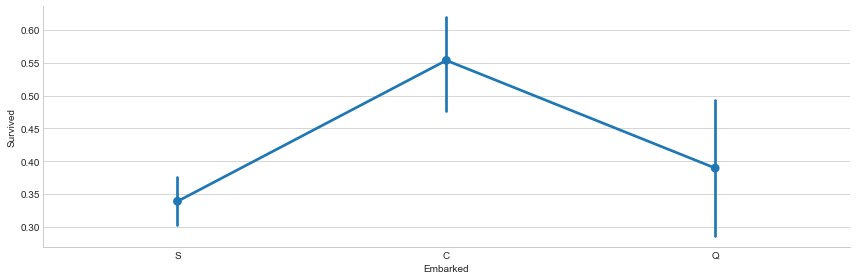

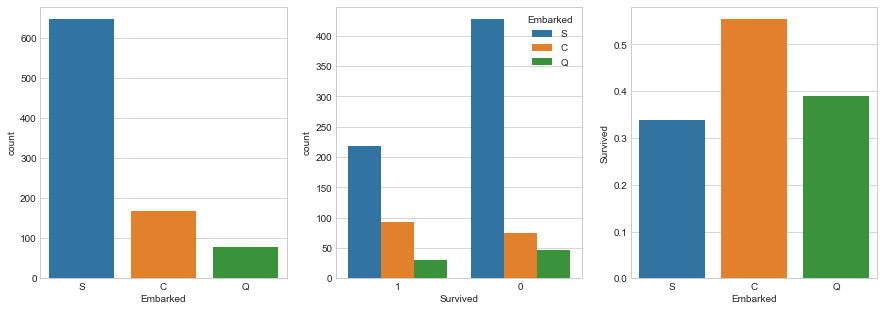

In [108]:
train_df.Embarked = train_df.Embarked.fillna('S')

# Plot

sns.factorplot('Embarked','Survived', data=train_df, size=4, aspect=3)

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue='Embarked',data=train_df, order=[1,0],ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = train_df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
sns.barplot(x='Embarked',y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)


In [109]:
embark_train_dummies = pd.get_dummies(train_df.Embarked)
embark_train_dummies.drop(['S'],axis=1,inplace=True)

embark_test_dummies = pd.get_dummies(test_df.Embarked)
embark_test_dummies.drop(['S'],axis=1,inplace=True)

train_df.join(embark_train_dummies)
test_df.join(embark_test_dummies)

train_df.drop('Embarked',axis=1,inplace=True)
test_df.drop('Embarked',axis=1,inplace=True)

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64
------------------------------
Missing Value Imputation
 Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       0
dtype: int64


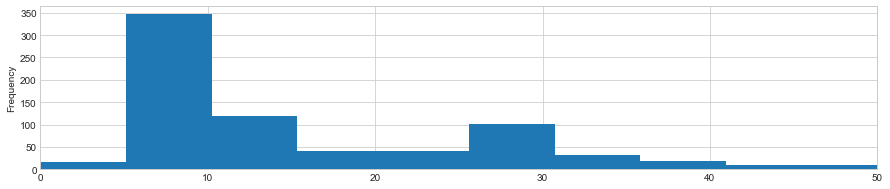

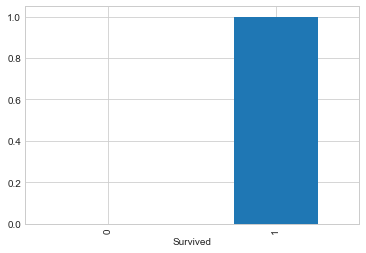

In [110]:
# Fare

# Only test data there is one missing value
print(test_df.isnull().sum())
test_df.Fare.fillna(test_df.Fare.median(),inplace=True)
print('-'*30)
print('Missing Value Imputation\n',test_df.isnull().sum())

# convert from float to int
train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_notsurvived = train_df['Survived'][train_df['Survived']==0]
fare_survived = train_df['Survived'][train_df['Survived']==1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_notsurvived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_notsurvived.std(), fare_survived.std()])

# Plot

train_df.Fare.plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

C:\Users\hiremamr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hiremamr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


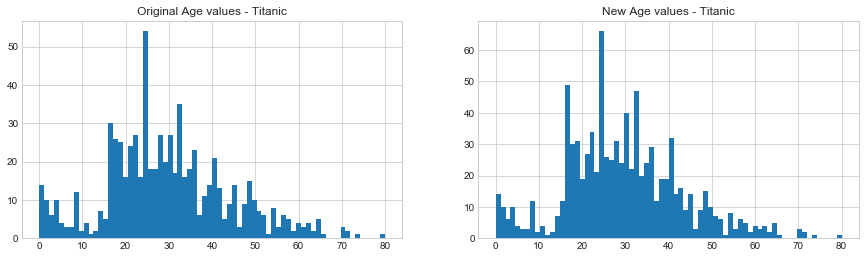

In [111]:
# Age

fig, (axis1,axis2) = plt.subplots(1,2, figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

avg_age_train = train_df.Age.mean()
std_age_train = train_df.Age.std()
count_nan_age_train = train_df.Age.isnull().sum()

avg_age_test = test_df.Age.mean()
std_age_test = test_df.Age.std()
count_nan_age_test = test_df.Age.isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(avg_age_train - std_age_train, avg_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(avg_age_test - std_age_test, avg_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis3)

# fill NaN values in Age column with random values generated
train_df["Age"][np.isnan(train_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
train_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)



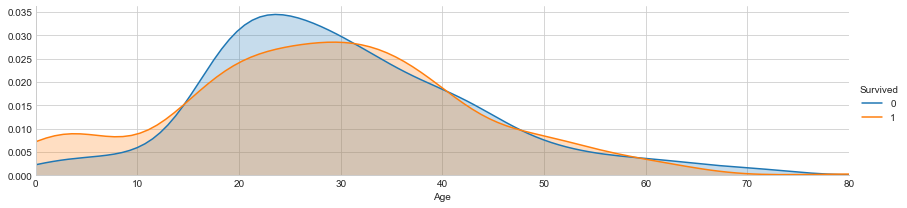

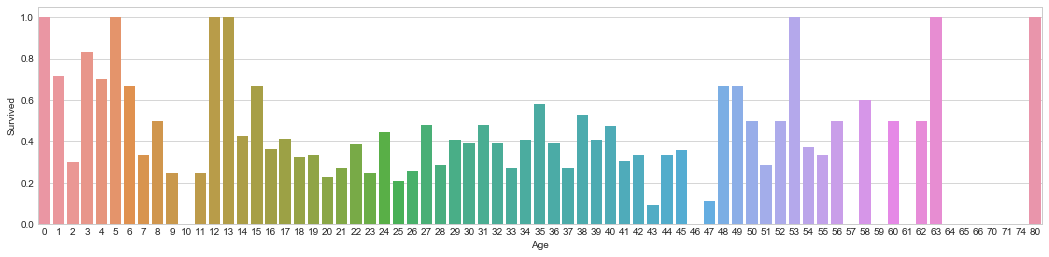

In [97]:
# ......Continue with plot Age column

# peaks for survived/not survived passengers by their age
g = sns.FacetGrid(train_df, hue='Survived',aspect=4)
g.map(sns.kdeplot,'Age',shade=True)
g.set(xlim=(0, train_df.Age.max()))
g.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [ ]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

C:\Users\hiremamr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

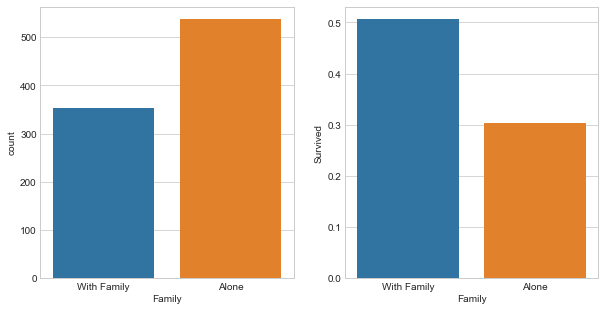

In [112]:
# Family

train_df['Family'] = train_df['Parch'] + train_df['SibSp']
train_df['Family'].loc[train_df['Family']>0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] = test_df['Parch'] + test_df['SibSp']
test_df['Family'].loc[test_df['Family']>0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

train_df.drop(['Parch','SibSp'],axis=1, inplace=True)
test_df.drop(['Parch','SibSp'],axis=1, inplace=True)

fig, (axis1, axis2) = plt.subplots(1,2, sharex=True, figsize=(10,5))

sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

family_perc = train_df[['Family', 'Survived']].groupby('Family',as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(['With Family', 'Alone'], rotation=0)

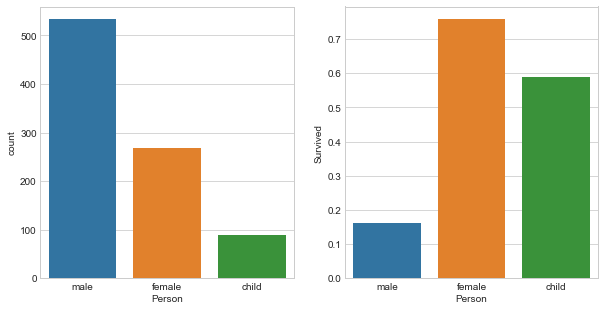

In [113]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child

def get_person(passenger):
    age, sex = passenger
    return 'child' if age<16 else sex

train_df['Person'] = train_df[['Age','Sex']].apply(get_person, axis=1)
test_df['Person'] = test_df[['Age','Sex']].apply(get_person,axis=1)

person_dummies_train = pd.get_dummies(train_df.Person)
person_dummies_train.columns = ['Child','Female', 'Male']
person_dummies_train.drop('Male',axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(person_dummies_train)
test_df = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=train_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

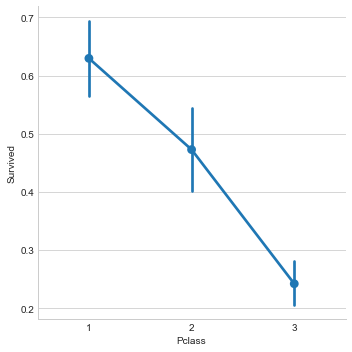

In [114]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_train  = pd.get_dummies(train_df['Pclass'])
pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_train.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_train)
test_df    = test_df.join(pclass_dummies_test)